# Background Stuff
Explain what we are doing here

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import os
import sys
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import describe
import re
from collections import Counter

from src.utils import prep_data, train_and_evaluate_model, get_x_y

SEED = 2018

Using TensorFlow backend.


In [10]:
number_epochs = [1, 2, 5, 10, 15, 20, 30]
num_trials = len(number_epochs)
scores = []
vocab_size = 200
max_review_len = 300

for counter, epochs in enumerate(number_epochs):
        print('Running trial ' + str(counter + 1) + ' of ' + str(num_trials))
        x_train_pad_sub, y_train_sub, x_test_pad_sub, y_test_sub = prep_data(
            vocab_size=vocab_size,
            max_review_len=max_review
        )

        scores.append(
            train_and_evaluate_model(
                x_train=x_train_pad_sub,
                y_train=y_train_sub,
                x_test=x_test_pad_sub,
                y_test=y_test_sub,
                num_epochs=epochs,
                max_review_len=max_review,
                verbose=0
            )
        )

Running trial 0 of 7
5000/5000 [==============================] - 21s 4ms/step
Running trial 1 of 7
5000/5000 [==============================] - 21s 4ms/step
Running trial 2 of 7
5000/5000 [==============================] - 22s 4ms/step
Running trial 3 of 7
5000/5000 [==============================] - 21s 4ms/step
Running trial 4 of 7
5000/5000 [==============================] - 21s 4ms/step
Running trial 5 of 7
5000/5000 [==============================] - 21s 4ms/step
Running trial 6 of 7
5000/5000 [==============================] - 19s 4ms/step


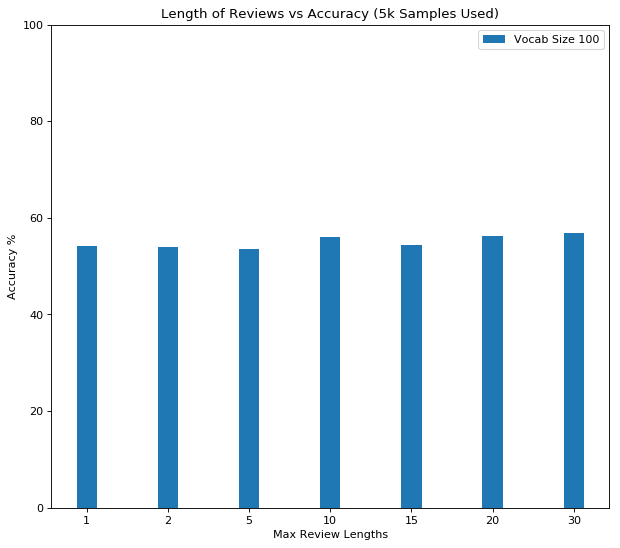

In [11]:
fig = plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
width = 0.25
plt.bar(x_range, scores, width)
x_range = np.arange(len(scores))
plt.xticks(x_range, number_epochs)
plt.ylim([0, 100])
plt.xlabel('Max Review Lengths')
plt.ylabel('Accuracy %')
plt.title('Length of Reviews vs Accuracy (5k Samples Used)')
plt.legend(legend_values)

plt.show()

## Comparison of Max Review Lenghts

In [8]:
max_review_lengths = [10, 50, 100, 200, 300, 400, 500]
vocab_sizes = [100, 250, 500]
scores = {}
counter = 1
num_trials = len(max_review_lengths) * len(vocab_sizes)

for vocab_size in vocab_sizes:
    scores[vocab_size] = []
    for max_review in max_review_lengths:
        print('Running trial ' + str(counter) + ' of ' + str(num_trials))
        x_train_pad_sub, y_train_sub, x_test_pad_sub, y_test_sub = prep_data(
            vocab_size=vocab_size,
            max_review_len=max_review
        )

        scores[vocab_size].append(
            train_and_evaluate_model(
                x_train=x_train_pad_sub,
                y_train=y_train_sub,
                x_test=x_test_pad_sub,
                y_test=y_test_sub,
                num_epochs=2,
                max_review_len=max_review,
                verbose=0
            )
        )

        counter += 1

Running trial 1 of 21
5000/5000 [==============================] - 1s 226us/step
Running trial 2 of 21
5000/5000 [==============================] - 3s 608us/step
Running trial 3 of 21
5000/5000 [==============================] - 5s 1ms/step
Running trial 4 of 21
5000/5000 [==============================] - 9s 2ms/step
Running trial 5 of 21
5000/5000 [==============================] - 13s 3ms/step
Running trial 6 of 21
5000/5000 [==============================] - 17s 3ms/step
Running trial 7 of 21
5000/5000 [==============================] - 21s 4ms/step
Running trial 8 of 21
5000/5000 [==============================] - 1s 267us/step
Running trial 9 of 21
5000/5000 [==============================] - 3s 670us/step
Running trial 10 of 21
5000/5000 [==============================] - 6s 1ms/step
Running trial 11 of 21
5000/5000 [==============================] - 10s 2ms/step
Running trial 12 of 21
5000/5000 [==============================] - 13s 3ms/step
Running trial 13 of 21
5000/5000 [==

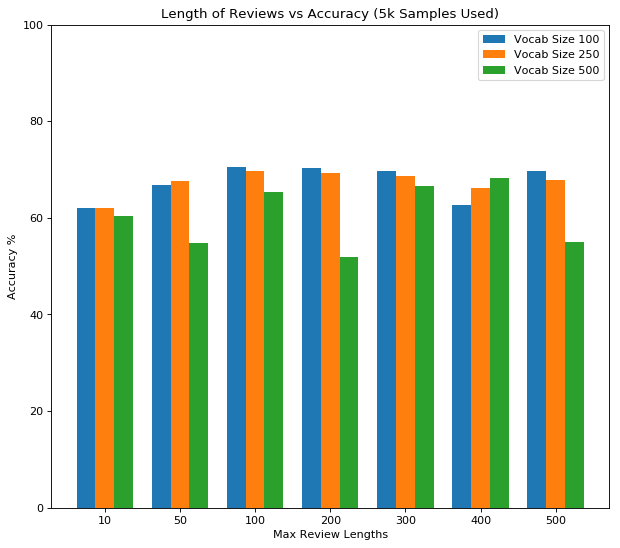

In [9]:
fig = plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
x_range = np.arange(len(next(iter(scores.values()))))
width = 0.25
legend_values = []

for counter, vocab_size in enumerate(scores):
    plt.bar(x_range + width*(counter - 1), scores[vocab_size], width)
    legend_values.append('Vocab Size ' + str(vocab_size))
    
plt.xticks(x_range, max_review_lengths)
plt.ylim([0, 100])
plt.xlabel('Max Review Lengths')
plt.ylabel('Accuracy %')
plt.title('Length of Reviews vs Accuracy (5k Samples Used)')
plt.legend(legend_values)

plt.show()